In [61]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [62]:
train_data = pd.read_csv("filtered_data.csv")
test_data = pd.read_csv("filtered_test.csv")

In [63]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test  = test_data.iloc[:, 0].values

In [64]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [65]:
svm_model = SVC(probability = True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [67]:
print(svm_model.score(X_test, y_test))
y_proba = svm_model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_proba))

0.78
0.922077922077922


In [68]:
params = {
    "kernel": ("linear", "rbf", "poly"),
    "C" : [ 0.01, 0.1, 0.5, 1, 2, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

svm_model = SVC(probability = True)
gridsearch = GridSearchCV(svm_model, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

svm_best = gridsearch.best_estimator_
print(svm_best.score(X_test, y_test))
y_proba = svm_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.7
0.74
0.9289772727272727


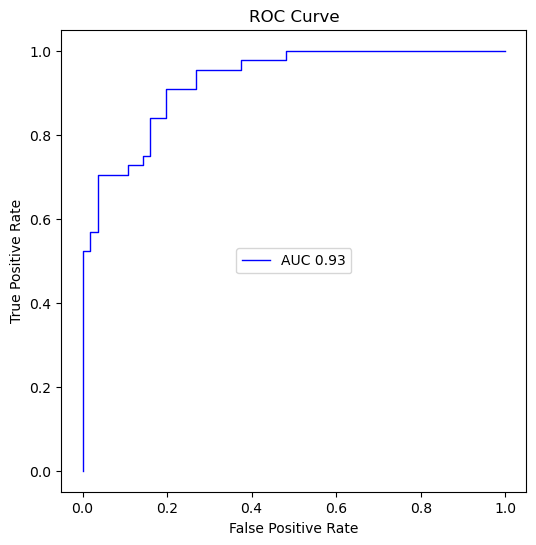

In [69]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, color = "blue", lw = 1, label = "AUC {:.2f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "center")

In [75]:
train_data = pd.read_csv("group_37.csv")
test_data = pd.read_csv("arcene_test (for groups 32-38).csv")
same_features = train_data.columns[1:]
test_data = test_data[["Class"] + list(same_features)]

In [76]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test  = test_data.iloc[:, 0].values

In [77]:
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [78]:
svm_model = SVC(probability = True)
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))
y_proba = svm_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

0.75
0.8713474025974026


In [79]:
params = {
    "kernel": ("linear", "rbf", "poly"),
    "C" : [ 0.01, 0.1, 0.5, 1, 2, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

svm_model = SVC(probability = True)
gridsearch = GridSearchCV(svm_model, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

svm_best = gridsearch.best_estimator_
print(svm_best.score(X_test, y_test))
y_proba = svm_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.9099999999999999
0.84
0.9303977272727273


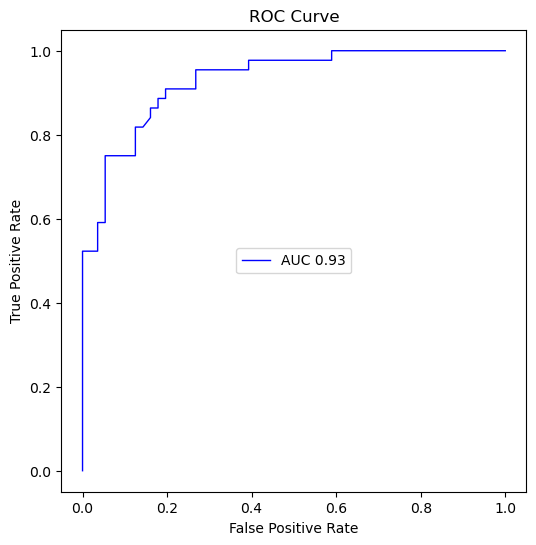

In [80]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, color = "blue", lw = 1, label = "AUC {:.2f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "center")